# P&D Explanatory Data Analysis

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the data file
df_original = pd.read_csv("pump_history_0831.csv", parse_dates=['date'],index_col = ['date'])
df_original.index = df_original.index.tz_localize('Asia/Tokyo')
df_original.index = df_original.index.tz_convert('UTC')

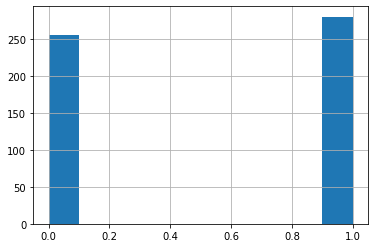

In [3]:
# define successful coin
df_successful = df_original[df_original["theoretical profit(%)"] > 0.05]
df_successful['success'] = 1
df_unsuccessful = df_original[df_original["theoretical profit(%)"] <= 0.05]
df_unsuccessful['success'] = 0
df = pd.concat([df_successful, df_unsuccessful])
df = df.sort_index()
df['success'].hist()

In [4]:
df

,order,channel,subscriber_0901,currency,exchange,duration,volume,price before pump,max price,our buy price,our profit(%),theoretical buy price,theoretical profit(%),channel.1,success
date,,,,,,,,,,,,,,,
2018-06-17 09:15:29+00:00,535,CryptoPump,NaN,KRL,Yobit,1,0.04,8.990000e-06,1.050000e-05,1.050000e-05,0.0000,1.050000e-05,0.0000,Show,0
2018-06-17 10:45:02+00:00,534,Tornado Signals,927.0,BNBX,Yobit,91,0.12,1.027000e-05,2.300000e-05,1.900000e-05,0.2105,1.899000e-05,0.2112,Show,1
2018-06-18 08:59:05+00:00,533,Shark Pump Signals,833.0,NETKO,Yobit,319,0.05,1.152000e-05,1.482000e-05,1.154000e-05,0.2842,1.152000e-05,0.2865,Show,1
2018-06-18 10:45:03+00:00,532,Tornado Signals,927.0,RR,Yobit,9,0.16,4.600000e-07,1.800000e-06,1.390000e-06,0.2950,1.390000e-06,0.2950,Show,1
2018-06-19 10:45:02+00:00,531,Tornado Signals,927.0,WIT,Yobit,5,0.16,1.000000e-07,4.500000e-07,3.100000e-07,0.4516,2.200000e-07,1.0455,Show,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-24 17:00:03+00:00,5,Big signal,601.0,GVT,Yobit,259,0.08,1.400000e-04,4.999900e-04,2.051000e-04,1.4378,1.467700e-04,2.4066,Show,1
2019-08-29 18:00:16+00:00,4,Global Pump Signals ??,6071.0,QSP,Binance,74,53.04,1.100000e-06,1.600000e-06,1.400000e-06,0.1429,1.400000e-06,0.1429,Show,1
2019-08-29 19:46:43+00:00,3,Bitcoin Profit Coach,8480.0,QSP,Binance,607,91.10,1.150000e-06,1.270000e-06,1.260000e-06,0.0079,1.270000e-06,0.0000,Show,0


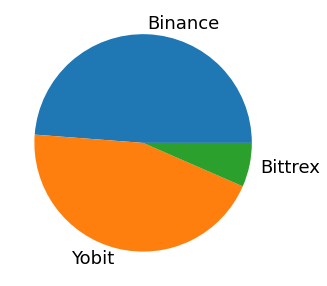

In [5]:
# the ratio of each exchange
plt.rcParams["font.size"] = 18
exchange = df['exchange'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(exchange, labels=exchange.index)
plt.savefig('img/exchange.jpg')
plt.rcParams["font.size"] = 16

In [6]:
# make exchange dummy variable
df = df.replace({'exchange': {'Yobit':2, 'Bittrex':1, 'Binance': 0}})
#fill NaN
df = df.fillna(0)

In [7]:
# import coin information
df_coin = pd.read_csv("coin_ranking_0902.csv")
df_coin.shape

(2349, 10)

In [8]:
# create new columns
df['ranked'] = 0
df['coin_cap'] = 0
df['coin_ranking'] = 0
df['coin_volume'] = 0

In [9]:
# match the two data sheet with top 1264 coins 
for idx in range(0, df.shape[0]):
    for idx2 in range(0, 1265):
        if df['currency'].iloc[idx] == df_coin['Symbol'].iloc[idx2]:
            df['ranked'].iloc[idx] = 1
            df['coin_cap'].iloc[idx] = float(df_coin['Market Cap'].iloc[idx2])
            df['coin_ranking'].iloc[idx] = int(df_coin['Ranking'].iloc[idx2])
            df['coin_volume'].iloc[idx] = float(df_coin['Volume (24h)'].iloc[idx2])

In [10]:
# get time information
df['month']= df.index.month
df['weekday']= df.index.weekday
df['hour']= df.index.hour

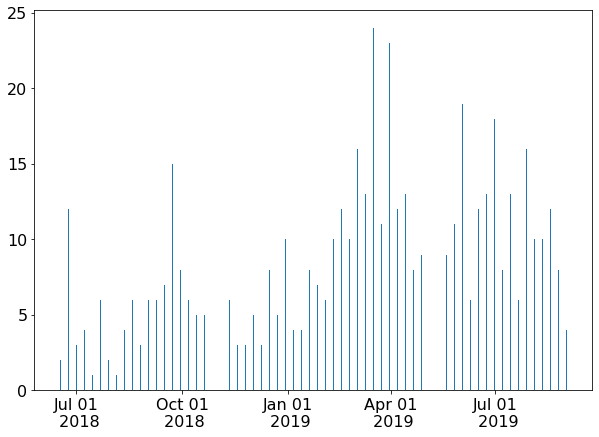

In [11]:
import matplotlib.dates as mdates
# get time series data
df_original['count'] = 1
df_week = df_original.resample('W').sum() 
fig, ax = plt.subplots(figsize=(10,7))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d\n %Y'))
ax.bar(df_week.index, df_week['count'])
plt.savefig('img/time-series.jpg')

In [12]:
# time zone
df_dates = df_original.set_index([df_original.index.year, df_original.index.month, df_original.index.day, df_original.index.weekday,
                            df_original.index.hour, df_original.index])
df_dates.index.names = ['year', 'month', 'day','weekday', 'hour', 'date']
df_dates.head()

order  \
year month day weekday hour date                               
2019 8     31  5       3    2019-08-31 03:37:54+00:00      1   
           30  4       16   2019-08-30 16:41:30+00:00      2   
           29  3       19   2019-08-29 19:46:43+00:00      3   
                       18   2019-08-29 18:00:16+00:00      4   
           24  5       17   2019-08-24 17:00:03+00:00      5   

                                                                           channel  \
year month day weekday hour date                                                     
2019 8     31  5       3    2019-08-31 03:37:54+00:00  Hot Signals Binance Bittrex   
           30  4       16   2019-08-30 16:41:30+00:00           Bitcoin Pump Group   
           29  3       19   2019-08-29 19:46:43+00:00         Bitcoin Profit Coach   
                       18   2019-08-29 18:00:16+00:00       Global Pump Signals ??   
           24  5       17   2019-08-24 17:00:03+00:00                   Big signal   

                                                       subscriber_0901  \
year month day weekday hour date                                         
2019 8     31  5       3    2019-08-31 03:37:54+00:00              NaN   
           30  4       16   2019-08-30 16:41:30+00:00          32202.0   
           29  3       19   2019-08-29 19:46:43+00:00           8480.0   
                       18   2019-08-29 18:00:16+00:00           6071.0   
           24  5       17   2019-08-24 17:00:03+00:00            601.0   

                                                      currency exchange  \
year month day weekday hour date                                          
2019 8     31  5       3    2019-08-31 03:37:54+00:00      KMD  Binance   
           30  4       16   2019-08-30 16:41:30+00:00      WAN  Binance   
           29  3       19   2019-08-29 19:46:43+00:00      QSP  Binance   
                       18   2019-08-29 18:00:16+00:00      QSP  Binance   
           24  5       17   2019-08-24 17:00:03+00:00      GVT    Yobit   

                                                       duration  volume  \
year month day weekday hour date                                          
2019 8     31  5       3    2019-08-31 03:37:54+00:00       211    5.28   
           30  4       16   2019-08-30 16:41:30+00:00       132  893.97   
           29  3       19   2019-08-29 19:46:43+00:00       607   91.10   
                       18   2019-08-29 18:00:16+00:00        74   53.04   
           24  5       17   2019-08-24 17:00:03+00:00       259    0.08   

                                                       price before pump  \
year month day weekday hour date                                           
2019 8     31  5       3    2019-08-31 03:37:54+00:00           0.000072   
           30  4       16   2019-08-30 16:41:30+00:00           0.000034   
           29  3       19   2019-08-29 19:46:43+00:00           0.000001   
                       18   2019-08-29 18:00:16+00:00           0.000001   
           24  5       17   2019-08-24 17:00:03+00:00           0.000140   

                                                       max price  \
year month day weekday hour date                                   
2019 8     31  5       3    2019-08-31 03:37:54+00:00   0.000073   
           30  4       16   2019-08-30 16:41:30+00:00   0.000040   
           29  3       19   2019-08-29 19:46:43+00:00   0.000001   
                       18   2019-08-29 18:00:16+00:00   0.000002   
           24  5       17   2019-08-24 17:00:03+00:00   0.000500   

                                                       our buy price  \
year month day weekday hour date                                       
2019 8     31  5       3    2019-08-31 03:37:54+00:00       0.000073   
           30  4       16   2019-08-30 16:41:30+00:00            NaN   
           29  3       19   2019-08-29 19:46:43+00:00       0.000001   
                       18   2019-08-29 18:00:16+00:00       0.

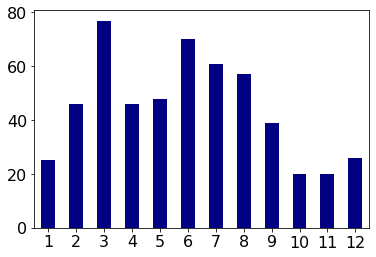

In [13]:
# sorted by month
month = df_dates['count'].sum(level='month').sort_index()
plt.figure(figsize=(6, 4))
fig = month.plot.bar(color='navy')
plt.xticks(rotation=0.45, fontsize=16)
plt.xlabel('')
plt.savefig('img/month.jpg')

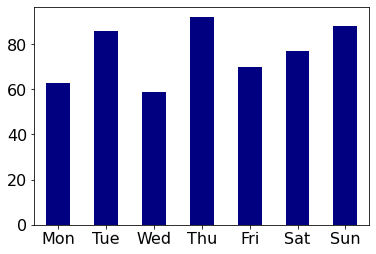

In [14]:
# sorted by weekday
weekday = df_dates['count'].sum(level='weekday').sort_index()
weekday = weekday.rename({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})
plt.figure(figsize=(6, 4))
fig = weekday.plot.bar(color='navy')
plt.xticks(rotation=0.45, fontsize=16)
plt.xlabel('')
plt.savefig('img/weekday.jpg')

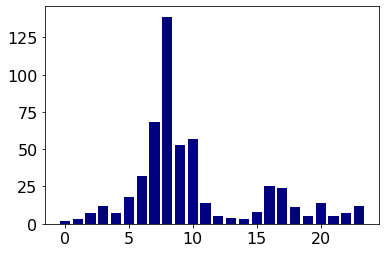

In [15]:
# sorted by hour
hour = df_dates['count'].sum(level='hour').sort_index()
plt.figure(figsize=(6, 4))
plt.bar(hour.index, hour, color='navy')
fig.set_xticks(np.arange(min(hour.index),max(hour.index)+1, 3))
plt.xticks(rotation=0.45, fontsize=16)
plt.xlabel('')
plt.savefig('img/hour.jpg')

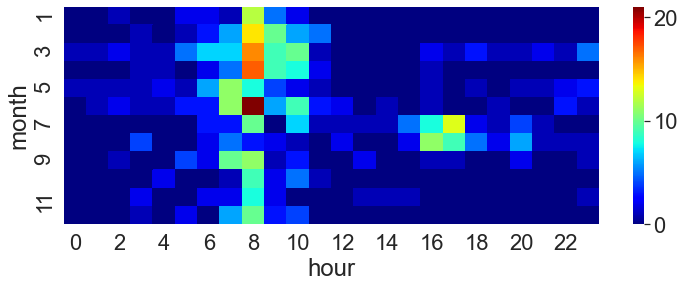

In [16]:
# heatmap by month and hour
sns.set(font_scale=2)
plt.figure(figsize=(12, 4))
sns.heatmap(df_dates['count'].sum(level=['month', 'hour']).sort_index().unstack(level='hour').fillna(0),cmap="jet") #annot=True,
plt.savefig('img/heatmap.jpg')

In [17]:
# define theoretical return
df['theoretical_return'] = df['theoretical profit(%)']+1
df['theoretical_return'].describe()

count    535.000000
mean       1.400478
std        0.861851
min        0.359000
25%        1.002950
50%        1.056500
75%        1.398100
max        9.589000
Name: theoretical_return, dtype: float64

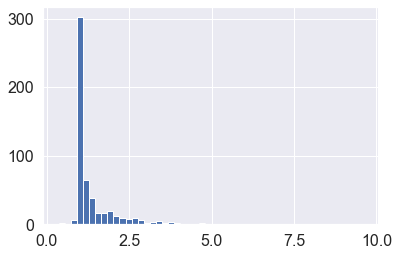

In [18]:
# theoretical profit
plt.figure(figsize=(6, 4))
plt.hist(df['theoretical_return'], bins =50)
plt.xlabel('')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('img/theoretical_return.jpg')

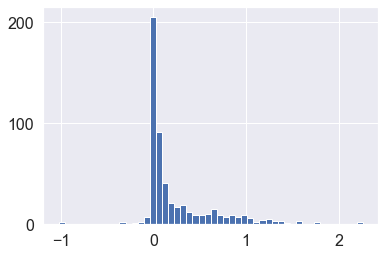

In [19]:
# log theoretical profit
plt.figure(figsize=(6, 4))
plt.hist(np.log(df['theoretical_return']), bins =50)
plt.xlabel('')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('img/theoretical_logreturn.jpg')

In [20]:
# check the skewness and kurtosis
print(df['theoretical_return'].skew())
print(df['theoretical_return'].kurtosis())
print(np.log(df['theoretical_return']).skew())
print(np.log(df['theoretical_return']).kurtosis())

4.5285232207899675
30.709209584101686
1.7981790780293023
4.177150249767614


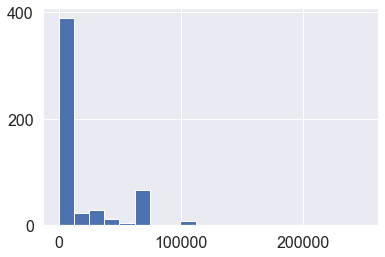

In [21]:
# subscriber
plt.figure(figsize=(6, 4))
plt.hist(df['subscriber_0901'], bins =20)
plt.xlabel('')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('img/subscriber.jpg')

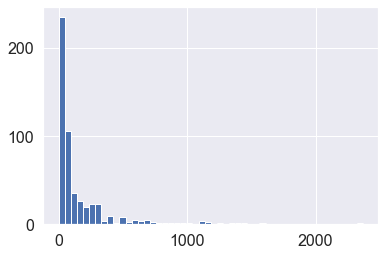

In [22]:
# duration
plt.figure(figsize=(6, 4))
plt.hist(df['duration'], bins = 50)
plt.xlabel('')
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('img/duration.jpg')